## Wednesday, 9/5: Data Analytics for Economists

### Outline:
1. Data anlaysis examples: Thinking about data
2. Why Python? Why not Excel?
2. Syllabus stuff

### Before we get started...

* Me: Prof. Kim Joseph Ruhl
* School: BS Bowling Green State Univeristy (Ohio); PhD U. Minnesota
    * Studied computer science and economics
* Jobs: Minneapolis FRB; U. Texas Austin; NYU Stern Business School; Penn State
* Research: International finance, macro, trade, multinational firms
    * Data + computational models
    * If you are curious: [kimjruhl.com/research](http://kimjruhl.com/research)
* Not work: Fly fishing, hiking, robots, home brewing 


### ... and a word on laptops
* This is a laptops-open course
* Resist the urge to view material not related to the course


## Introduction: Thinking about data. 

This course is about using data and 'the right kind of analysis' to answer questions. 

1. What is the question we are trying to answer? Throughout the course (and the rest of your lives) you should be generating questions. 
2. Data: Where does it come from? What questions can it answer?
3. What is 'the right kind of analysis?' Often, this is creating a visualization (e.g., a plot, a map) to convey information. Using the right kind of visualization is part of the analysis. 

Let's look at some visualizations:

1. Gapminder
2. Voting in Wisconsin
3. The jobs report

### Gapminder
Go to [https://www.gapminder.org/tools/#$chart-type=bubbles]

1. What does the visualization tell you? 
2. What kind of data are used? Where are they from?
3. What else would you like to know?

### Voting in Wisconsin

Go to [https://www.nytimes.com/elections/results/wisconsin](https://www.nytimes.com/elections/results/wisconsin) and focus on the presidential results

Take 5 minutes (work with those around you) and try to answer:
1. What does the visualization tell you? 
2. What kind of data are used? Where are they from?
3. What else would you like to know?

### The employment situation

Publisehd the first Friday of each month. Find it at [https://www.bls.gov](https://www.bls.gov), by choosing from the 'Economic Releases' menu: 'Employment and Unemployment.'

Review definitions:
1. Employed

2. Unemployed

3. Not in the labor force

Go to [https://projects.fivethirtyeight.com/jobs-day](https://projects.fivethirtyeight.com/jobs-day) and scroll down to the figure titled 'The unemployment rate' and the figures that follow. 

Take 5 minutes (work with those around you) and try to answer:
1. What does the visualization tell you? 
2. What kind of data are used? Where are they from?
3. What else would you like to know?
___


## Why Python?

We want to:
* Work with large(ish) datasets
* Manage numeric data and 'string' data
* Have control over our figures' appearence 
* Be transparent: Can our work be replicated?
* Automate repetitive stuff

Python gives us
* A reasaonbly fast language
* Great support for numeric and string manipulation
* Many plotting options
* Ways to create well-documented analysis
* Automation

 

### An example
Let's plot the dollar-yuan exchange rate to get feel for what we can do with Python. (I do not expect you to follow all of this today!) 

We will get the data from the [St. Louis FRB FRED](https://fred.stlouisfed.org/) database. We will work with FRED often. It is an easy place to get economic data.

In [1]:
# Do some preliminary things to get Python set up.

# Import needed packages
import pandas as pd                            # the workhorse data package

# There is an issue with datareader. The line below is the quick fix. Supposed to be fixed in reader version 0.7. 
# See https://stackoverflow.com/questions/50394873/
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader.data as web           # for FRED data calls
import matplotlib.pyplot as plt                # for plots
import datetime as dt                          # for dates


# IPython command to include plots in the notebook
%matplotlib inline

In [2]:
# Create datetime objects to hold the begin and end dates
start = dt.datetime(1990, 1, 1)
end = dt.datetime(2013, 1, 27)

# Get monthly Yuan-per-dollar exchange rate. 'fred' tells the data reader to use the FRED repository.
# 'EXCHUS' is the name of the data series in FRED. You can find the series codes (names) on the FRED website.
exchus = web.DataReader('EXCHUS', 'fred', start, end)

# Print out the first 3 observations.
print(exchus.head(3))

            EXCHUS
DATE              
1990-01-01  4.7339
1990-02-01  4.7339
1990-03-01  4.7339


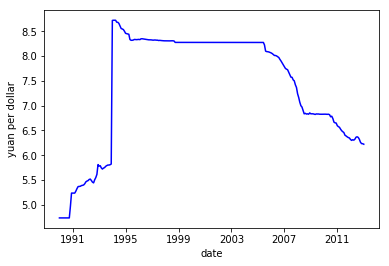

In [3]:
# The basic plotting command. The 'b-' means 'make the line blue.'
plt.plot(exchus.index, exchus['EXCHUS'], 'b-' )
plt.xlabel('date')                  # neccessary?
plt.ylabel('yuan per dollar')
plt.savefig('ch_us_exrate.pdf')     # Save the figure as a pdf. Good for including in documents.


That worked pretty well! We could continue to customize the plot by adding data markers, changing colors, adding legends, etc. We will leave that stuff for later. 

We could have made that figure in Excel. Did Python buy us much? In this case, maybe not, although I would argue that 
```python
exchus = web.DataReader('EXCHUS', 'fred', start, end)
```
is easier than going to FRED, downloading the data, getting set up in a workbook and then plotting. 

### Automating work in Python

What if we need to make several plots? 

Python just requires a few exta lines of code. Again, don't worry about the details, we are just taking a quick look at what Python can do for us. All of this will make more sense later. 


In [4]:
# Make list with the names of the data we would like to plot.
ctry_list = ['EXCHUS', 'EXJPUS', 'EXCAUS']      # China, Japan, Canada

# Make a list of the units for the y axis.
units = ['yuan per dollar', 'yen per dollar', 'Canadian dollar per U.S. dollar' ]

#Read the data. Pass a list of codes rather a single string.
ex_many = web.DataReader(ctry_list, 'fred', start, end)
print(ex_many.head(3))

            EXCHUS    EXJPUS  EXCAUS
DATE                                
1990-01-01  4.7339  144.9819  1.1720
1990-02-01  4.7339  145.6932  1.1965
1990-03-01  4.7339  153.3082  1.1800


To plot, we loop over the list of variable names (and the units) and plot them. 

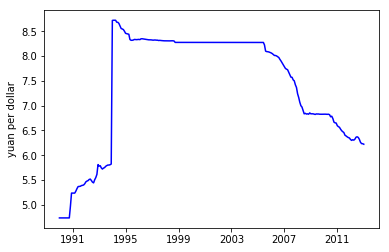

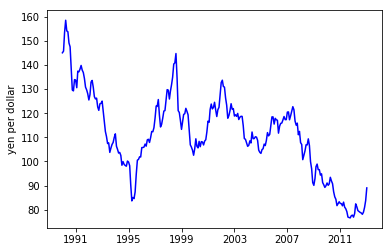

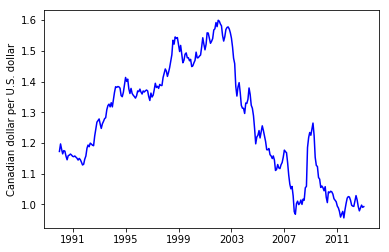

In [5]:
for ctry, unit in zip(ctry_list, units) :
    plt.figure()
    plt.plot(ex_many.index, ex_many[ctry], 'b-')
    plt.ylabel(unit)

___

## Course information

* This information is in the syllabus
* Ask questions as we go

## Expectations
* Prerequisites: Econ 410 and (Econ 301 or Econ 311)

* Class is a mixture of **economics** and
  * Learning to pose questions and think in terms of data
  * Learning about data sources and how to use them
  * Learning to program (as a means to an end)
  * Learning to analyze data and present it in useful ways
  
  
 * Attendance
   * Not mandatory, but expected
   * Textbook is a reference
   * Work through problems in class
   * Chance to ask questions and make comments

## Course materials
* Reference text: *Python for Data Analysis* by Wes McKinney (2nd ed)
  * This more of a reference than a textbook
  * $30 on Amazon.com; ebook versions available
* Besides the text: Lots (and lots and lots) of free online guides, tutorials, and references
* Course webpage: [http://kimjruhl.com/data-analysis/](http://kimjruhl.com/data-analysis/)
  * Everything you need is here
  * Thematic and week-by-week schedule
  * Links to data and resources
  * Constantly being improved

## Grades
deliverable | weight in final grade
------------- | ---
Best 4 coding practices | 4%
Exam 1 | 20%
Exam 2| 20%
Project proposal | 6%
Project | 50%


* **Coding practice:** Five assignments meant to help you practice coding. Graded check, check+, or check-. Check or check+ earns full 1%. Check- earns 0%. Lowest score dropped. 
* **Exams:** Take home exam (open book, open internet), but not colaborative! 

* **Project:** This is a chance to develop a piece of data anlaysis that showcases what you have learned in class. Two deliverables
  1. A 3-page professional report that presents your analsysis to someone who is interested in the results, but not the technical details
  2. A well-documented Jupyter Notebook with the technical details
  
  
* A project proposal (submitted after some initial analysis). The proposal goal is to make sure that you and I are on the same page before you do the hard work!

## Attendance, again

* No attendance grade, but you really should be here
* Exams are take home, so an excused will be very rare, 
  * If religous or university related, notify me ASAP
  
## Important dates

* Exam weekends: October 12-15; November 16-19
* Project proposal: November 26
* Project: December 14

## Need some help?

* Come see me (office hours TBD next week)
* Send me email: ruhl2@wisc.edu
* See the TA: Dennis McWeeny (dmcweeny@wisc.edu)
* Google. Seriously! 

## Technical details
* We will be working on Winstat
  * Windows servers that are pre-loaded (and managed!) by the Social Sciences Computing Cooperative (SSCC)
  * MA students and a few other already have accounts. Do you know your login? If not, email Caitlin Tefft (ctefft@ssc.wisc.edu) for help
  * If you have never had a SSCC account, check your email for details. 
  * On Monday, we will go through connecting to winstat. If you are feeling up to it, go to [https://ssc.wisc.edu/sscc/winstat.htm](https://ssc.wisc.edu/sscc/winstat.htm) and see if you can get up and running.
  